In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,AvgPool2D, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.activations import relu, softmax, sigmoid, tanh
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
print("Train data shape: ", x_train.shape)
print("Test data shape: ", x_test.shape)


Train data shape:  (60000, 28, 28)
Test data shape:  (10000, 28, 28)


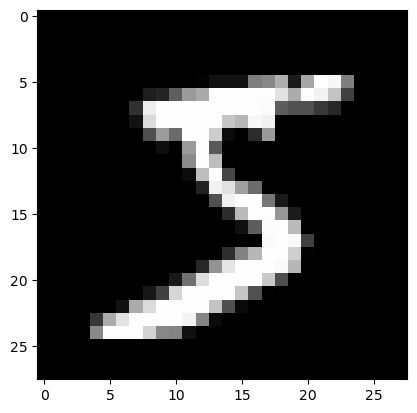

Label:  5


In [13]:
plt.imshow(x_train[0], cmap='gray')
plt.show()
print("Label: ", y_train[0])

In [14]:
# normalize the data
print("Before normalization: (x_train) ", x_train.shape)
print("Before normalization: (x_test)", x_test.shape)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Before normalization: (x_train) ", x_train.shape)
print("Before normalization: (x_test)", x_test.shape)


Before normalization: (x_train)  (60000, 28, 28)
Before normalization: (x_test) (10000, 28, 28)
Before normalization: (x_train)  (60000, 28, 28, 1)
Before normalization: (x_test) (10000, 28, 28, 1)


In [16]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [19]:
# create the model

lenet = Sequential(
    [
        # layer 1
        # first layer is the convolutional layer
        # 6 filters, each filter is 5x5
        # input shape is 28x28x1
        # activation function is tanh
        Conv2D(6, kernel_size=(5, 5), activation="tanh", input_shape=(28, 28, 1)),
        AvgPool2D(pool_size=2, strides=2),


        # layer 2
        # second layer is the convolutional layer
        # 15 filters, each filter is 5x5
        # activation function is tanh
        # input shape is 14x14x6
        Conv2D(15, kernel_size=(5, 5), activation="tanh", input_shape=(14, 14, 6)),
        AvgPool2D(pool_size=2, strides=2),

        # layer 3
        # flatten the output of the previous layer
        Flatten(),
        
        # layer 4
        # FC layer with 120 neurons, activation function is tanh
        Dense(120, activation="tanh"),
        
        # layer 5
        # FC layer with 84 neurons, activation function is tanh
        Dense(84, activation="tanh"),
        
        # layer 6
        # output layer with 10 neurons, activation function is softmax
        Dense(10, activation="softmax")            
    ]
)

lenet.compile(optimizer=SGD(learning_rate=0.01), loss=categorical_crossentropy, metrics=["accuracy"])

lenet.summary()

c:\Users\ah760\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 15)       │         2,265 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 4, 4, 15)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 240)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │        28,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,355 (165.45 KB)

 Trainable params: 42,355 (165.45 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
lenet.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9415 - loss: 0.1964 - val_accuracy: 0.9490 - val_loss: 0.1801
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9438 - loss: 0.1880 - val_accuracy: 0.9510 - val_loss: 0.1723
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9454 - loss: 0.1814 - val_accuracy: 0.9531 - val_loss: 0.1658
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9473 - loss: 0.1776 - val_accuracy: 0.9545 - val_loss: 0.1592
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9490 - loss: 0.1651 - val_accuracy: 0.9561 - val_loss: 0.1539
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9548 - loss: 0.1547 - val_accuracy: 0.9567 - val_loss: 0.1478
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9542 - loss: 0.1543 - val_accuracy: 0.9576 - val_loss: 0.1428
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9590 - loss: 0.1449 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted:  7
Actual:  7


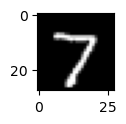



Predicted:  2
Actual:  2


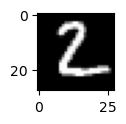



Predicted:  1
Actual:  1


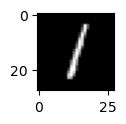



Predicted:  0
Actual:  0


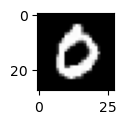



Predicted:  4
Actual:  4


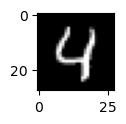



Predicted:  1
Actual:  1


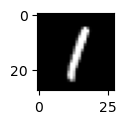



Predicted:  4
Actual:  4


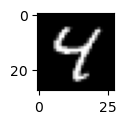



Predicted:  9
Actual:  9


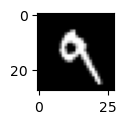



Predicted:  9
Actual:  9


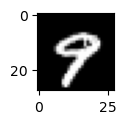



Predicted:  0
Actual:  0


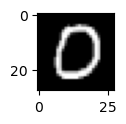



Predicted:  6
Actual:  6


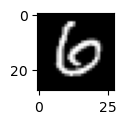



Predicted:  9
Actual:  9


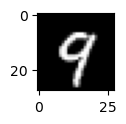



Predicted:  0
Actual:  0


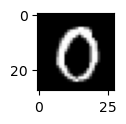



Predicted:  1
Actual:  1


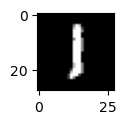



Predicted:  5
Actual:  5


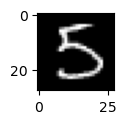



Predicted:  9
Actual:  9


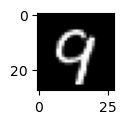



Predicted:  7
Actual:  7


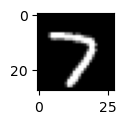



Predicted:  4
Actual:  4


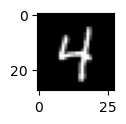



Total errors in first 20 sample = :  2


In [30]:
predicitons = lenet.predict(x_test)

predicitons = np.argmax(predicitons, axis=1)
error = 0

for i in range(20):
    if predicitons[i] != np.argmax(y_test[i]):
        error += 1
        continue
    print("Predicted: ", predicitons[i])
    print("Actual: ", np.argmax(y_test[i]))
    plt.figure(figsize=(1, 1))
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.show()
    print("\n")

print("Total errors in first 20 sample = : ", error)